# loss, perp をプロット

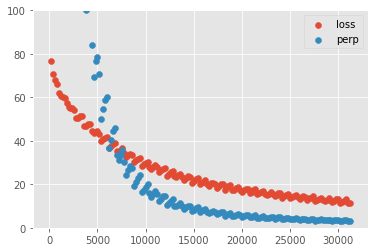

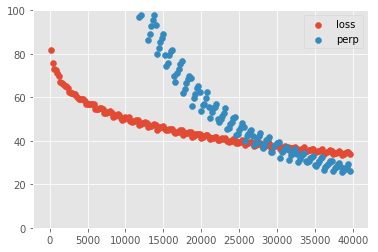

In [104]:
%matplotlib inline

#coding: utf-8
import matplotlib.pyplot as plt
import numpy as np
import os
import json
plt.style.use('ggplot') 

# グラフ
def plot_loss_perp(result_dir = 'result/'):
    f = open(os.path.join(result_dir, 'log'), 'r')
    log = json.load(f)
    
    iter = [d["iteration"] for d in log]
    epoch = [d["epoch"] for d in log]
    loss = [d["main/loss"] for d in log]
    perp = [d["main/perp"] for d in log]
    
    plt.scatter(iter, loss, label="loss")
    plt.scatter(iter, perp, label="perp")
    plt.legend()
    plt.ylim([0, 100])
    plt.show()
    
plot_loss_perp()
plot_loss_perp(result_dir = 'result_ae_0120_4/')


# bleu, rouge, F値をプロット

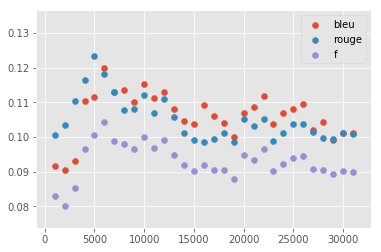

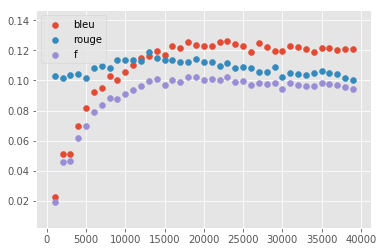

In [105]:
def plot_bleu(result_dir = 'result/'):
    f = open(os.path.join(result_dir, 'log'), 'r')
    log = json.load(f)
    
    iter = []
    bleu = []
    rouge = []
    f = []
    for d in log:
        if "bleu" in d:
            iter.append(d["iteration"])
            bleu.append(d["bleu"])
            rouge.append(d["rouge"])
            f.append(d["f"])
    
    plt.scatter(iter, bleu, label="bleu")
    plt.scatter(iter, rouge, label="rouge")
    plt.scatter(iter, f, label="f")
    plt.legend()
    plt.show()
    
plot_bleu()
plot_bleu(result_dir = 'result_ae_0120_4/')

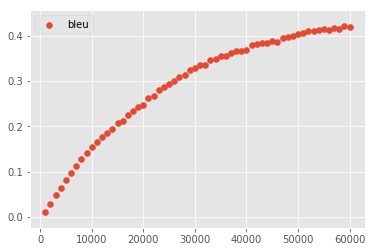

In [99]:
def plot_bleu_old(result_dir = 'result/'):
    f = open(os.path.join(result_dir, 'log'), 'r')
    log = json.load(f)
    
    iter = []
    bleu = []
    for d in log:
        if "validation/main/bleu" in d:
            iter.append(d["iteration"])
            bleu.append(d["validation/main/bleu"])
    
    plt.scatter(iter, bleu, label="bleu")
    plt.legend()
    plt.show()
    
plot_bleu_old(result_dir = 'result_ae_0119/')